6.4 Machine Learning Part 1

This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

01 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

02 Import Dataframe

In [8]:
# Importing dataframe
path = r'C:\Users\henry\OneDrive\Achievement 6'
df = pd.read_csv(os.path.join(path, 'Data', 'flavors_of_cacao_cleaned.csv'))

03 Data Cleaning

In [11]:
df.head


<bound method NDFrame.head of      Company  (Maker-if known)             BarName   REF  ReviewDate  \
0                     A. Morin         Agua Grande  1876        2016   
1                     A. Morin               Kpime  1676        2015   
2                     A. Morin              Atsane  1676        2015   
3                     A. Morin               Akata  1680        2015   
4                     A. Morin              Quilla  1704        2015   
...                        ...                 ...   ...         ...   
1790                    Zotter                Peru   647        2011   
1791                    Zotter               Congo   749        2011   
1792                    Zotter        Kerala State   749        2011   
1793                    Zotter        Kerala State   781        2011   
1794                    Zotter  Brazil, Mitzi Blue   486        2010   

      CocoaPercent Location  Rating   BeanType BroadOrigin  
0             63.0   France    3.75         

In [13]:
# Drop columns not used in EDA
for col in ['REF', 'BarName']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

In [15]:
# Confirm final shape and columns
df.shape, df.columns.tolist()

((1795, 7),
 ['Company\xa0 (Maker-if known)',
  'ReviewDate',
  'CocoaPercent',
  'Location',
  'Rating',
  'BeanType',
  'BroadOrigin'])

In [17]:
# Normalize all column names: replace any \xa0 with a normal space, then strip leading/trailing whitespace
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]

In [19]:
# Now rename the cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin']

In [21]:
# Check for missing values
df.isnull().sum()

Company         0
ReviewDate      0
CocoaPercent    0
Location        0
Rating          0
BeanType        0
BroadOrigin     1
dtype: int64

In [23]:
# replace missing value for the BroadOrigin column with unknown
df['BroadOrigin'] = df['BroadOrigin'].fillna('unknown')

In [25]:
# Verify replacement
df.isnull().sum()

Company         0
ReviewDate      0
CocoaPercent    0
Location        0
Rating          0
BeanType        0
BroadOrigin     0
dtype: int64

In [27]:
# Duplicates check
dups = df.duplicated()

In [29]:
dups.shape

(1795,)

No duplicates

# Data prep for regression


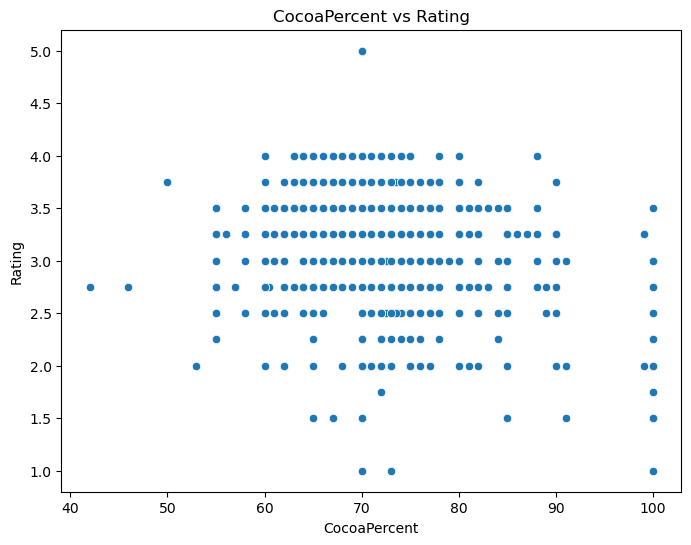

In [33]:
# Visual check
plt.figure(figsize=(8,6))
sns.scatterplot(x='CocoaPercent', y='Rating', data=df)
plt.title('CocoaPercent vs Rating')
plt.show()

In [35]:
# Define X (feature) and y (target)
X = df[['CocoaPercent']].values
y = df['Rating'].values

In [37]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Hypothesis
"Higher cocoa percentage is associated with lower average chocolate ratings.”

Regression analysis


In [41]:
# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

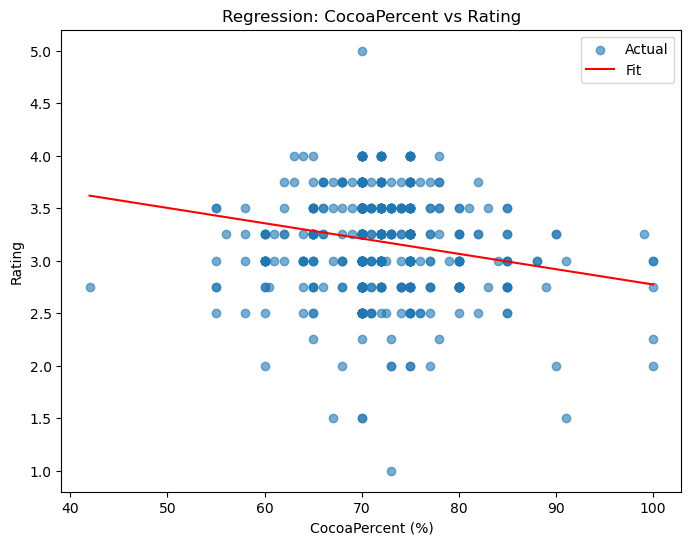

In [43]:
# Plot regression line on test set
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual')
line_X = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
plt.plot(line_X, model.predict(line_X), color='red', label='Fit')
plt.title('Regression: CocoaPercent vs Rating')
plt.xlabel('CocoaPercent (%)')
plt.ylabel('Rating')
plt.legend()
plt.show()

# Interpretation of Regression Fit

- **Slope & Direction**  
  The regression line has a **slight negative slope**, confirming our hypothesis that higher cocoa percentages tend to be associated with lower average ratings.


In [45]:
# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.22
R² Score: 0.00


In [47]:
# Compare actual vs. predicted
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).head(10)

,Actual,Predicted
0,3.00,3.138328
1,3.75,3.211284
2,3.50,3.211284
3,3.50,3.167511
4,3.00,3.211284
5,3.00,3.182102
6,2.75,3.152919
7,3.75,3.211284
8,2.50,3.065372
9,3.25,3.211284


### Model Performance on the Test Set

- **Mean Squared Error (MSE):** The model’s MSE of *\<0.22\>* indicates the average squared deviation between predicted and actual ratings, which is fairly large relative to the rating scale (1–5), showing substantial prediction error.  
- **Visual Fit:** The scatter of test‐set points around the red regression line reveals considerable residuals, especially for mid‐range cocoa percentages where the data are densest. Overall, the fit is weak to moderate—sufficient to illustrate a downward trend but not reliable for precise prediction.

### Reflections on Data Bias

- **Sampling Bias:** Our dataset may over‐represent certain countries, companies, or bean types (e.g., popular bar producers), skewing average ratings upward or downward depending on reviewer demographics.  
- **Reviewer Bias:** Ratings are subjective; cultural or regional taste preferences could systematically influence scores, making some origins look better or worse simply due to reviewer palate rather than objective quality.  
  
